In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
import json
import os
from sklearn.preprocessing import LabelEncoder
import warnings
# Ignore useless warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Avoid runtime error messages
pd.set_option('display.float_format', lambda x:'%f'%x)

# make notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_FOLDER = "sparkify"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<Figure size 1600x800 with 0 Axes>

In [4]:
'''
# Matplotlib Summary

# set figure size (width, height)
plt.figure(figsize = [10, 5])

# Create subplots
# creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0).
# subplot 1: example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['num_var'].max()+4, 4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

# subplot 2: example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['num_var'].max()+1/4, 1/4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

# Creating a bunch of subplots
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    # do something with the current axis.. in this case print the index number in the middle of the axis
    plt.text(0.5, 0.5, i+1)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
'''

"\n# Matplotlib Summary\n\n# set figure size (width, height)\nplt.figure(figsize = [10, 5])\n\n# Create subplots\n# creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0).\n# subplot 1: example of somewhat too-large bin size\nplt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1\nbin_edges = np.arange(0, df['num_var'].max()+4, 4)\nplt.hist(data = df, x = 'num_var', bins = bin_edges)\n\n# subplot 2: example of somewhat too-small bin size\nplt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2\nbin_edges = np.arange(0, df['num_var'].max()+1/4, 1/4)\nplt.hist(data = df, x = 'num_var', bins = bin_edges)\n\n# Creating a bunch of subplots\nfig, axes = 

# EDA

## Train-Test Split

In [5]:
'''
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["label_column"]):
    train = df.loc[train_index]
    test = df.loc[test_index]

fetch_dir = 'data/'+PROJECT_FOLDER
fetch_from = fetch_dir+'/train.csv'
train.to_csv(fetch_from)
fetch_from = fetch_dir+'/test.csv'
test.to_csv(fetch_from)
'''

'''
# If label_column is a continuous int, convert it into categories/strata to use in StratifiedShuffleSplit above
df["label_column"] = pd.cut(df["label_int"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df["label_column"].hist()
'''

'\n# If label_column is a continuous int, convert it into categories/strata to use in StratifiedShuffleSplit above\ndf["label_column"] = pd.cut(df["label_int"],\n                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],\n                               labels=[1, 2, 3, 4, 5])\ndf["label_column"].hist()\n'

## Fetch Data

In [10]:
# JSON
fetch_from = 'data/'+PROJECT_FOLDER+'/mini_sparkify_event_data.json'
train1 = pd.read_json(fetch_from)

ValueError: Trailing data

## Overview of training and test datasets

In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

In [9]:
train[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
test[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
train.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.000000,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500


In [13]:
test.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1084,2545,50,RL,74.000000,16287,Pave,NaN,Reg,Lvl,AllPub,...,100,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [14]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Saving figure feature_histogram_plots


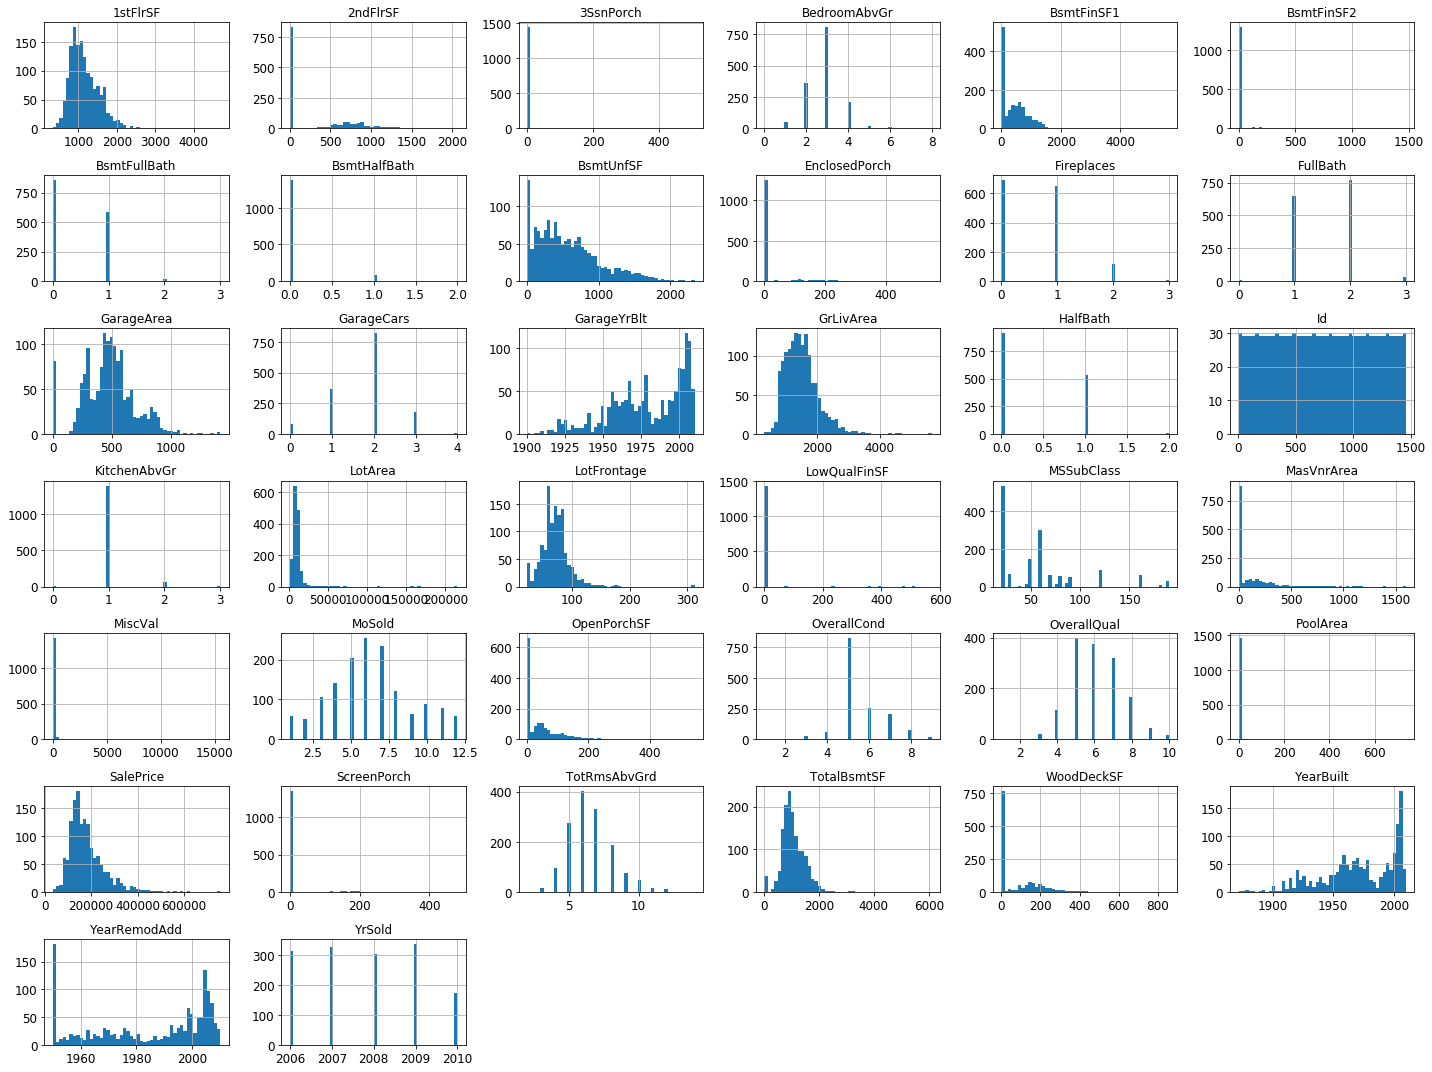

In [16]:
train.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
save_fig("feature_histogram_plots")
plt.show()

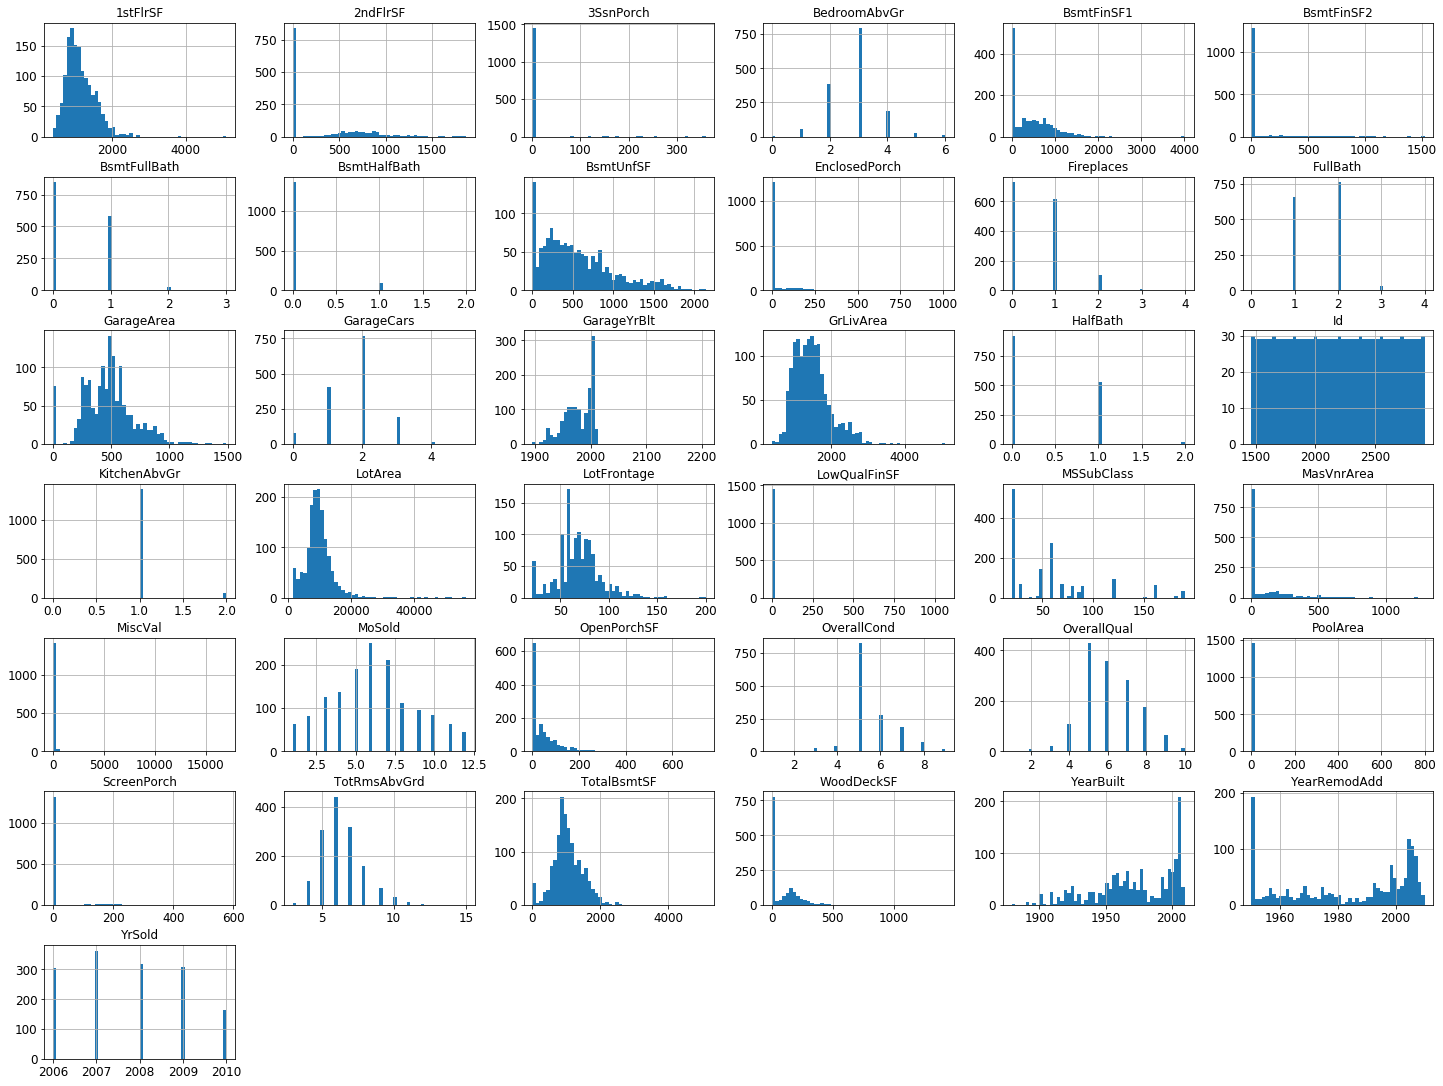

In [17]:
test.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [18]:
train.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [19]:
test.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


## Deeper Dive Into Dataset

### Missing Values

In [20]:
train.isnull().sum().sum()

6965

In [21]:
# Top n columns
n = 5
missing_values_count = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing_values_count[:n]

PoolQC        99.520548
MiscFeature   96.301370
Alley         93.767123
Fence         80.753425
FireplaceQu   47.260274
dtype: float64

In [22]:
def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/train.isnull().count()*100)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(np.transpose(missing_values))
missing_data(train)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
Total,1453,1406,1369,1179,690,259,81,81,81,81,...,0,0,0,0,0,0,0,0,0,0
Percent,99.520548,96.301370,93.767123,80.753425,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Types,object,object,object,object,object,float64,float64,object,object,object,...,int64,int64,object,object,object,object,object,object,object,int64


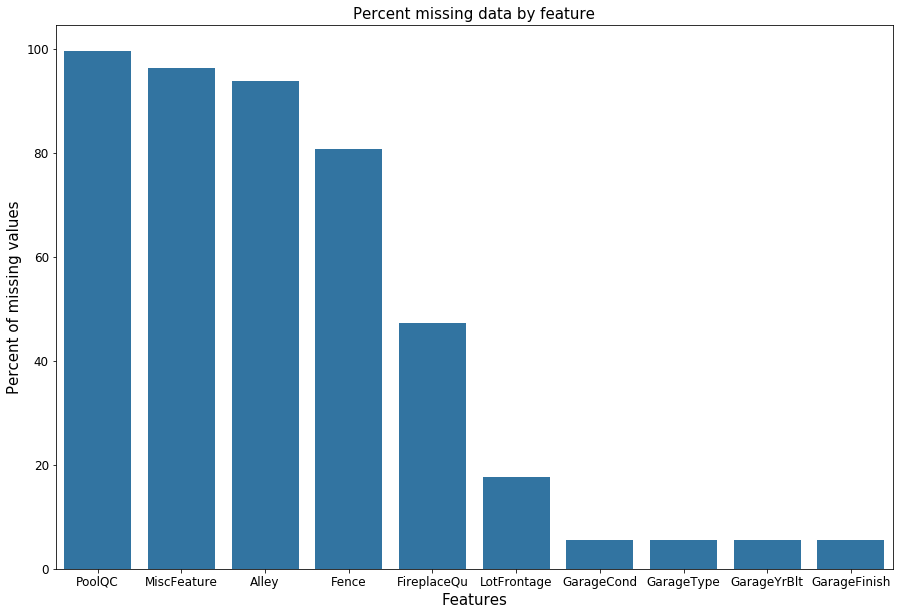

In [23]:
# Plot missing values vs column_names
# The 1st argument contains the x-values (column names), the 2nd argument the y-values (missing counts)
missing_values_count = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
plt.figure(figsize=(15,10))
base_color = sns.color_palette()[0]
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)

### Outliers

In [24]:
# get all numerical columns
df_num = train.select_dtypes(include=[np.number]).columns.tolist()
df_num

# Calculate modified z_score
for col in df_num:
    df_outliers = train[(np.abs(train[col]-train[col].median()) > (3.5*train[col].mad()))]

# Uncomment to show outliers
# df_outliers

### Duplicated Values

In [25]:
# See if there's any duplicate values(cause of nicknames/misspellings/multiple ways of expressing a value), or default 'John Doe' type values
for col in train:
    train[train[col].duplicated()]


In [ ]:
features = train_df.columns.values[2:202]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train_df[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test_df[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

# top 15 max of duplicate values per train set
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

# top 15 number of duplicates values per test set
np.transpose((pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

## Exploring Features

In [27]:
train_eda = train.copy()

In [28]:
label_col = 'SalePrice'

### Correlations

In [29]:
# Pearson correlation
train_eda.corr()

# Kendall Tau correlation
train_eda.corr('kendall')

# Spearman Rank correlation
train_eda.corr('spearman')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,...,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,...,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,...,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,...,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,...,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,...,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,...,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,...,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,...,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,...,0.179359,0.081420,-0.148339,0.046802,0.071989,0.057586,0.005097,-0.016405,0.020793,0.301871


In [30]:
corr_matrix = train_eda.corr()
corr_matrix[label_col].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

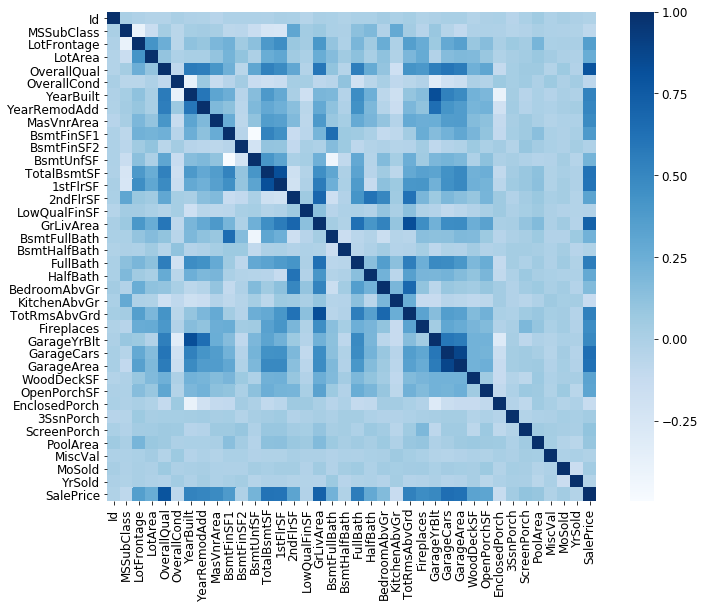

In [31]:
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=1.0, square=True, cmap="Blues")

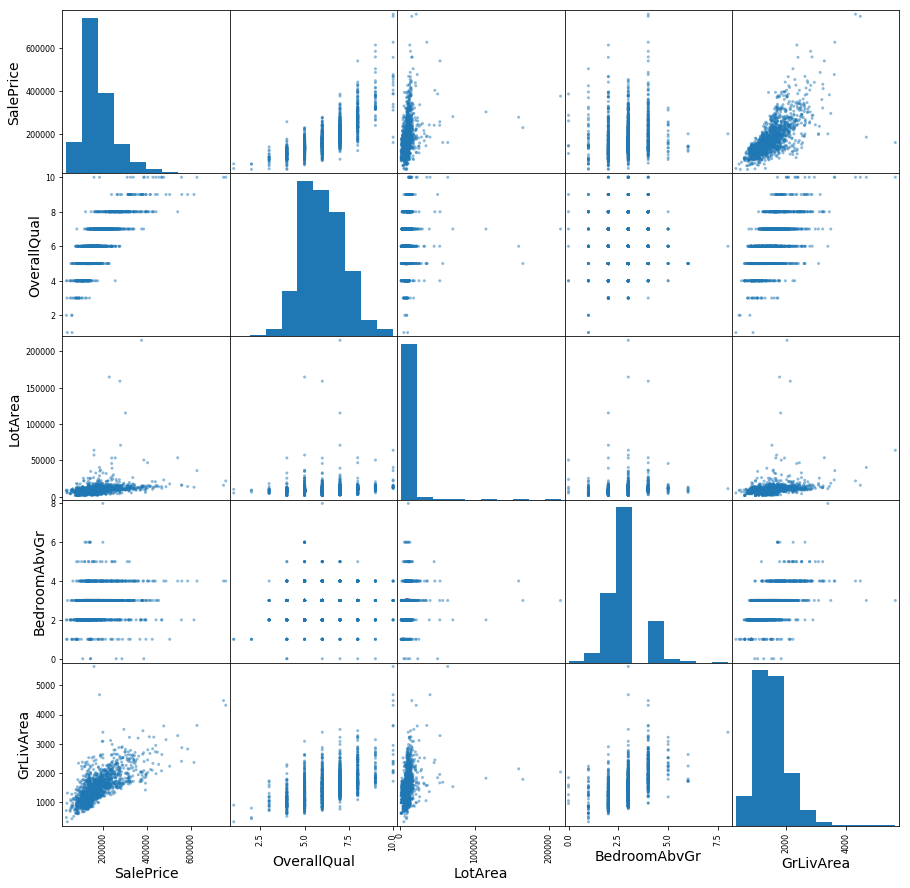

In [32]:
from pandas.plotting import scatter_matrix

attributes = [label_col, "OverallQual", "LotArea", "BedroomAbvGr", "GrLivArea"]
scatter_matrix(train_eda[attributes], figsize=(15, 15));

### Dataset Distributions

#### Density plots of features

In [ ]:
# We represent with different colors the distribution for values with target value 0 and 1.
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

In [ ]:
# create plots for the first 100 features
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[:101]
plot_feature_distribution(t0, t1, '0', '1', features)

In [ ]:
# distribution of the same features in parallel in train and test datasets
features = train_df.columns.values[:101]
plot_feature_distribution(train, test, 'train', 'test', features)

#### Distributions of mean and std for test vs training sets

In [ ]:
# distribution of the mean values per row in the train and test set
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of the mean values per columns in the train and test set
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of standard deviation of values per row for train and test datasets
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train_df[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

In [ ]:
# distribution of the standard deviation of values per columns in the train and test datasets
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

In [ ]:
# distribution of the mean value per row in the train dataset, grouped by value of target
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set")
sns.distplot(t0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

In [ ]:
# distribution of the mean value per column in the train dataset, grouped by value of target
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

#### Distribution of min and max

In [ ]:
# distribution of min per row in the train and test set
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train_df[features].min(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of min per column in the train and test set
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per column in the train and test set")
sns.distplot(train_df[features].min(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of max values per rows for train and test set
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(train_df[features].max(axis=1),color="brown", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of max values per column for train and test set
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per column in the train and test set")
sns.distplot(train_df[features].max(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distributions of min values per row in train set, separated on the values of target (0 and 1)
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train set")
sns.distplot(t0[features].min(axis=1),color="orange", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

In [ ]:
# distribution of min values per columns in train set
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per column in the train set")
sns.distplot(t0[features].min(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

In [ ]:
# distribution of max values per rown in the train set
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row in the train set")
sns.distplot(t0[features].max(axis=1),color="gold", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

In [ ]:
# distribution of max values per columns in the train set
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per column in the train set")
sns.distplot(t0[features].max(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

#### Distribution of skew and kurtosis

In [ ]:
# distribution of skewness calculated per rows in train and test sets
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per row in the train and test set")
sns.distplot(train_df[features].skew(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].skew(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of skewness calculated per columns in train and test set
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(train_df[features].skew(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].skew(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of kurtosis calculated per rows in train and test sets
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per row in the train and test set")
sns.distplot(train_df[features].kurtosis(axis=1),color="darkblue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].kurtosis(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of kurtosis calculated per columns in train and test sets
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per column in the train and test set")
sns.distplot(train_df[features].kurtosis(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].kurtosis(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# distribution of skewness on rows in train separated for values of target 0 and 1
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per row in the train set")
sns.distplot(t0[features].skew(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].skew(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

In [ ]:
# distribution of skewness on columns in train separated for values of target 0 and 1
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per column in the train set")
sns.distplot(t0[features].skew(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].skew(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

In [ ]:
# distribution of kurtosis on rows in train separated for values of target 0 and 1
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per row in the train set")
sns.distplot(t0[features].kurtosis(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].kurtosis(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

In [ ]:
# distribution of kurtosis on columns in train separated for values of target 0 and 1
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per column in the train set")
sns.distplot(t0[features].kurtosis(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].kurtosis(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

### Target variable vs other features

#### Categorical Variables

In [33]:
train_eda.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


##### Frequency Table

In [34]:
# get freq table and proportions in one table
col_name = 'LotShape'
freq_table = pd.crosstab(index=train_eda[col_name],  # Make a crosstab
                              columns="count")      # Name the count column
freq_table_per = pd.crosstab(index=train_eda[col_name],  # Make a crosstab
                              columns="percentage", normalize=True)
freq_table['percentage'] = freq_table_per['percentage']
freq_table.sort_values(by='count', ascending=False)

col_0,count,percentage
LotShape,,
Reg,925,0.633562
IR1,484,0.331507
IR2,41,0.028082
IR3,10,0.006849


##### Bar Plot

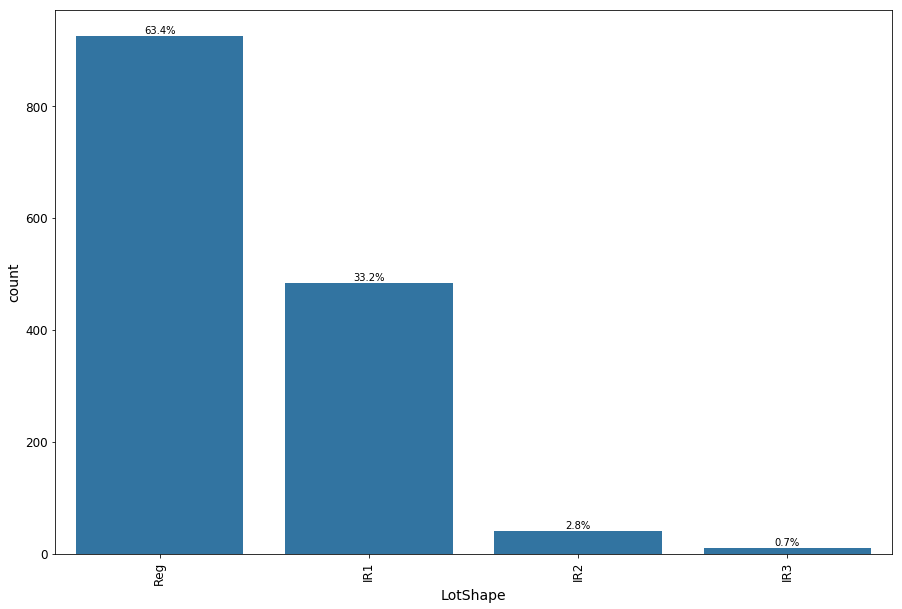

In [35]:
# Relative frequency variation - Plotting absolute counts on axis and porportions on the bars
# Barchart sorted by frequency
base_color = sns.color_palette()[0]
cat_order = train_eda[col_name].value_counts().index
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
sns.countplot(data = train_eda, x = col_name, order = cat_order, color = base_color);

# add annotations
n_points = train_eda.shape[0]
cat_counts = train_eda[col_name].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+4, pct_string, ha = 'center', color = 'black')

##### Waffle Plot

(-0.8900000000000001, 9.89, 0.0, 10.780000000000001)

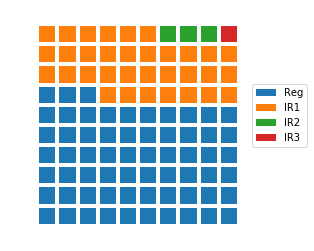

In [36]:
# There's no built-in function for waffle plots in Matplotlib or Seaborn, so we'll need to take some additional steps in order to build one with the tools available.
# The blocks are drawn from left to right, bottom to top
# First, we need to create a function to decide how many blocks to allocate to each category. The function below, percentage_blocks, uses a rule where each category gets a number of blocks equal to the number of full percentage points it covers. The remaining blocks to get to the full one hundred are assigned to the categories with the largest fractional parts.
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)
    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1
    return counts

# Second, plot those counts as boxes in the waffle plot form
waffle_counts = percentage_blocks(train_eda, col_name)
prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# Third, we need to do involve aesthetic cleaning to polish it up for interpretability. We can take away the plot border and ticks, since they're arbitrary, but we should change the limits so that the boxes are square. We should also add a legend so that the mapping from colors to category levels is clear.
# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')

##### Donut Plot

(-1.1156011989747219,
 1.1111671811030464,
 -1.1144471228780857,
 1.1123212571996826)

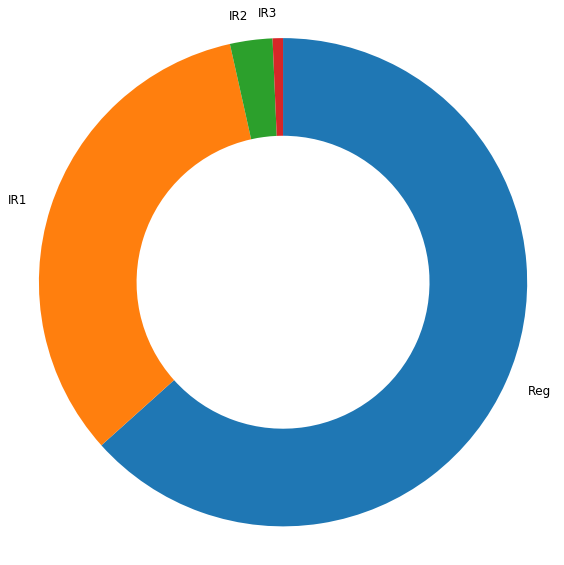

In [37]:
# Donut Chart
plt.figure(figsize=(15,10))
sorted_counts = train_eda[col_name].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

##### Frequency Table for multiple variables

In [38]:
col_name = 'LotShape'
surv_s_class = pd.crosstab(index=train_eda["SaleType"], 
                             columns=[train_eda["GarageType"],
                                      train_eda["LotShape"]],
                             margins=True)
surv_s_class

GarageType 2Types Attchd              Basment     BuiltIn             CarPort  \
LotShape      Reg    IR1 IR2 IR3  Reg     IR1 Reg     IR1 IR2 IR3 Reg     IR1   
SaleType                                                                        
COD             0     10   0   0   15       2   2       0   0   0   0       0   
CWD             0      1   0   0    2       0   0       0   0   0   0       0   
Con             0      1   0   0    1       0   0       0   0   0   0       0   
ConLD           0      0   0   0    4       0   0       0   0   0   1       0   
ConLI           0      0   0   0    0       0   0       2   0   0   0       0   
ConLw           0      0   1   0    1       0   0       0   0   0   0       0   
New             0     36   3   1   56       0   1      10   1   1   7       0   
Oth             0      0   0   0    1       0   0       0   0   0   0       0   
WD              6    298  23   4  412       4  10      27   5   3  31       2   
All             6    346  27   5  492       6  13      39   6   4  39       2   

GarageType         Detchd                All  
LotShape   IR2 Reg    IR1 IR2 IR3  Reg        
SaleType                                      
COD          0   1      2   0   0   11    43  
CWD          0   0      0   0   0    1     4  
Con          0   0      0   0   0    0     2  
ConLD        0   0      0   0   0    2     7  
ConLI        0   0      0   0   0    2     4  
ConLw        0   0      1   0   0    1     4  
New          0   0      1   0   0    3   120  
Oth          0   0      0   0   0    0     1  
WD           1   5     70   7   1  285  1194  
All          1   6     74   7   1  305  1379

##### Stacked bar chart

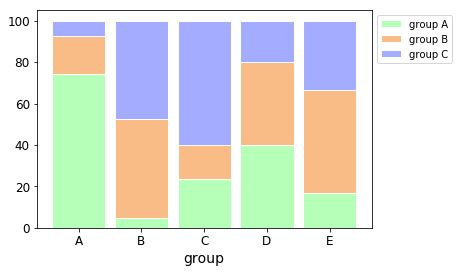

In [39]:
# Stacked plot
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="group C")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

#### Numerical Variables

In [40]:
train_eda.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Distribution

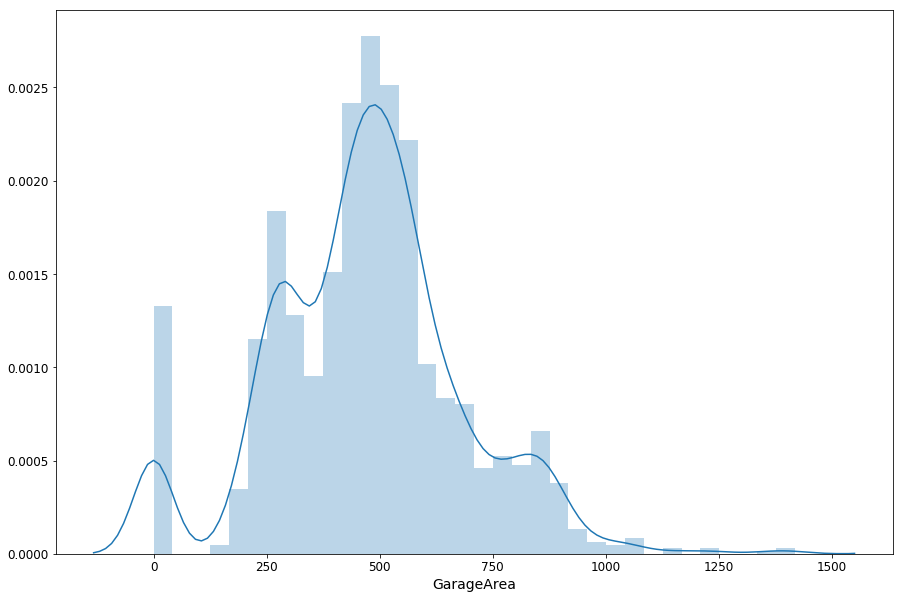

In [41]:
# Create a dist plot
col_name = 'GarageArea'
hist_kws={"alpha": 0.3}
plt.figure(figsize=(15,10))
# Trim long-tail/other values
# plt.xlim(0, 1200)
sns.distplot(train_eda[col_name], hist_kws=hist_kws)

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


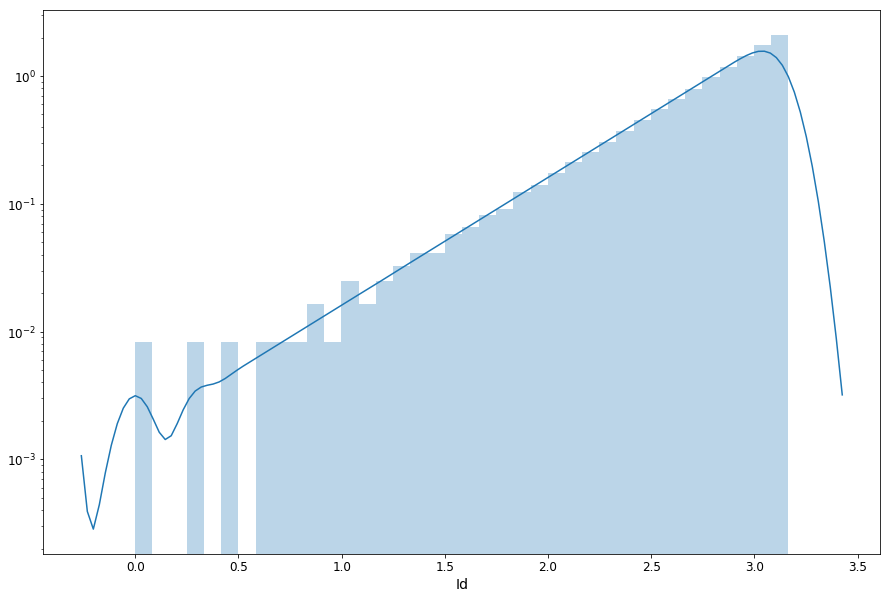

In [42]:
# Dist Plot in Log Scale
col_name = 'Id'
hist_kws={"alpha": 0.3, 'log':True}
plt.figure(figsize=(15,10))
sns.distplot(np.log10(train_eda[col_name]), hist_kws=hist_kws);

In [ ]:
# Optional: Trim long-tail/other values and create KDE again
ceiling_value = 500000
df_trimmed = df.loc[df.index[df.price < ceiling_value]].sample(n=50000)
sns.kdeplot(df_trimmed.col_name)
plt.show()

##### Box and Whisker Plot

In [ ]:
base_color = sns.color_palette()[0]
sns.boxplot(data = train_eda, x = 'cat_var', y = 'num_var', color = base_color)

##### Violin Plot (Visualize the distribution of one numerical variable or lots of categorical variables)

In [ ]:
# Area depicts the distribution of points. > width = > the number of points
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
# switch x and y parameter values to make this a horizontal chart

##### Scatter Plot

[0, 400000, 0, 1200]

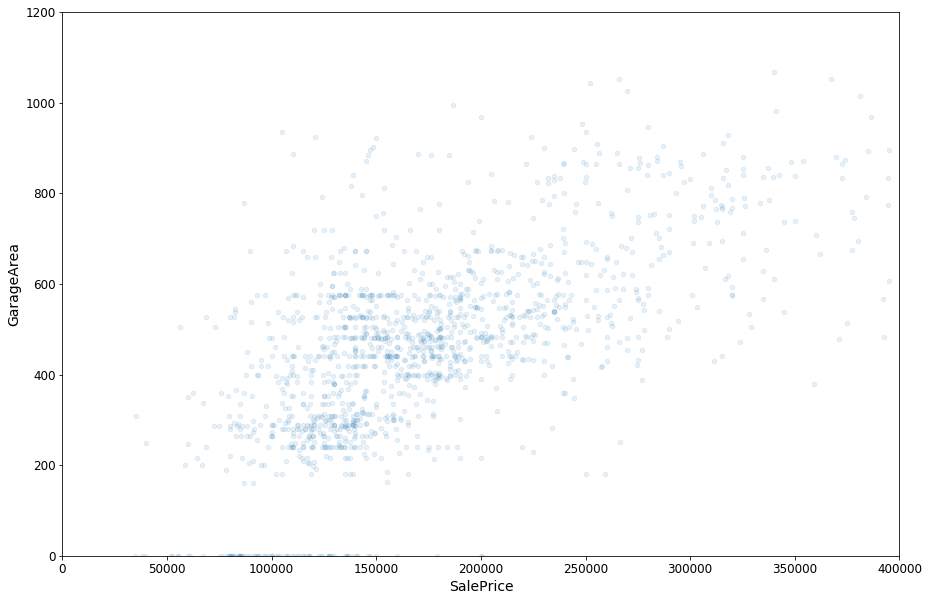

In [44]:
col_name = 'GarageArea'
train_eda.plot(kind="scatter", x=label_col, y=col_name, alpha=0.1, figsize=(15,10))
# changing axis labels to only show part of the graph
plt.axis([0, 400000, 0, 1200])

#### Multivariate Plots

##### Summary

| Univariate             | Graphical                               | Non-Graphical                     | 
|-------------|-----------------------------------------|-----------------------------------|
| Categorical | Bar char of frequencies (count / percent) | Frequency/Contingency table (count / percent) |
| Num/Continuous  | Histogram/rugplot/KDE, box/violin/swarm, qqplot, fat tails  | central tendency -mean/median/mode, spread - variance, std, skew, kurt, IQR  |

| Bivariate/multivariate            | Graphical                               | Non-Graphical                     | 
|-------------|-----------------------------------------|-----------------------------------|
| Categorical vs Categorical | heat map, mosaic plot | Two-way Contingency table (count/percent) |
| Continuous vs Continuous  | all pairwise scatterplots, kde, heatmaps |  all pairwise correlation/regression   |
| Categorical vs Continuous  | [bar, violin, swarm, point, strip seaborn plots](http://seaborn.pydata.org/tutorial/categorical.html)  | Summary statistics for each level |

##### Scatter Plot

In [ ]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
# adding a diagonal line through the chart values can help determine trends easily
# You can see if points are above or below the x=y relationship line, therefore if x is higher than y or vice versa
plt.plot([min_value,max_value], [min_value,max_value])

In [ ]:
# If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.
# In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative.
# Add Transparency to deal with Overplotting
# Where more points overlap, the darker the image will be.
plt.scatter(data = df, x = 'disc_var1', y = 'disc_var2', alpha = 0.2)


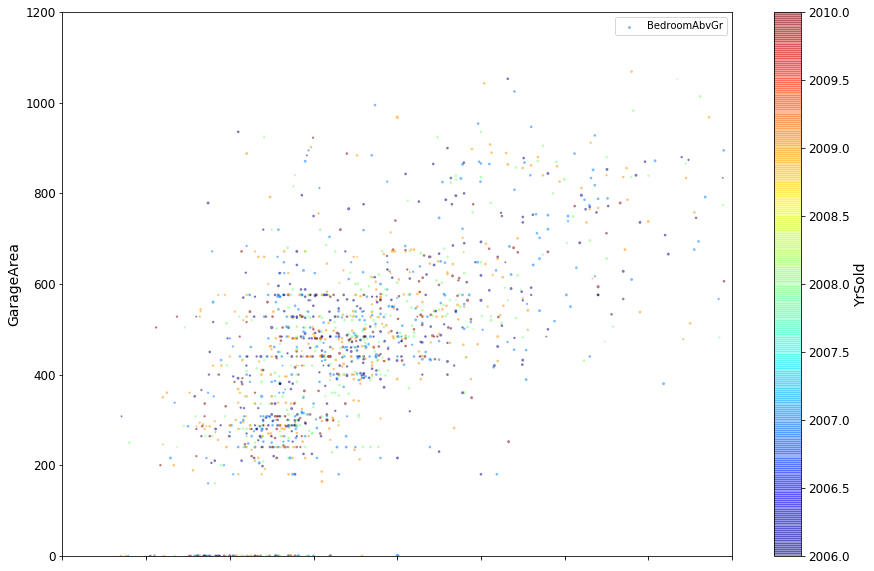

In [48]:
# With color and size
train_eda.plot(kind="scatter", x=label_col, y="GarageArea", alpha=0.4,
             s=train_eda["BedroomAbvGr"], label="BedroomAbvGr", figsize=(15,10),
             c="YrSold", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.axis([0, 400000, 0, 1200])
plt.legend()

##### Reg Plot

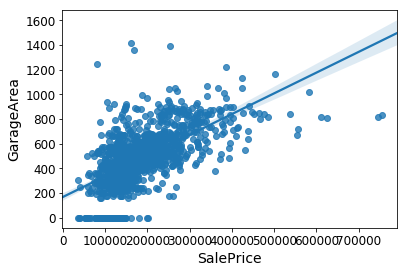

In [52]:
# regplot combines scatterplot with regression function fitting
sns.regplot(data = df, x = 'num_var1', y = 'num_var2')

In [ ]:
# Add Jitter to deal with Overplotting
# adding jitter moves the position of each point slightly from its true value
# each point will be plotted in a uniform ±0.2 range of its true values
# jitter won't affect the fit of any regression function, if made
sns.regplot(data = df, x = 'disc_var1', y = 'disc_var2', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

##### Heat Map

In [ ]:
# Visual relationship between the color and density of data
# Add counts cause color perception is imprecise
# Prefer this over a scatterplot if we have 2 discrete variables since the jitter scatterplot can be imprecise. It's also better than adding transparency to a scatterplot in cases where there's a large amount of data.
# However, bin size does affect our interpretation of the data, so make sure to pick the right bin size
# darker values = higher value counts
# specify bin edges for the x and y axis
bins_x = np.arange(0.6, df['disc_var1'].max()+0.4, 0.4)
bins_y = np.arange(0, df['disc_var2'].max()+50, 50)
plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)')

In [ ]:
# Heat Map with counts in each cell
# If you have too many cells in your heat map, then the annotations will end up being too overwhelming,
# too much to attend to. In cases like that, it's best to leave off the annotations and let the data
# and colorbar speak for themselves. You're more likely to see annotations in a categorical heat map,
# where there are going to be fewer cells plotted.
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.6, df['disc_var1'].max()+0.4, 0.4)
bins_y = np.arange(0, df['disc_var2'].max()+50, 50)
h2d = plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
counts = h2d[0]
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)')

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

In [ ]:
# Heat Map (Categorical vs Categorical)
# Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.
ct_counts = df.groupby(['cat_var1', 'cat_var2']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'cat_var2', columns = 'cat_var1', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd')
# You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.

##### Violin Plot (Categorical vs Numeric)

In [ ]:
# Area depicts the distribution of points. > width = > the number of points
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
# switch x and y parameter values to make this a horizontal chart

##### Box Plot (Categorical vs Numeric)

In [ ]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
# switch x and y parameter values to make this a horizontal chart

##### Clustered Bar Charts (Categorical vs Categorical)

In [ ]:
sns.countplot(data = df, x = 'cat_var1', hue = 'cat_var2')

##### Faceting (Categorical vs Numeric)

In [ ]:
# Faceting histograms of the quantitative variable, against the qualitative subsets of data
# Facet by col='' parameter
bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sns.FacetGrid(data = df, col = 'cat_var', size = 2, col_wrap=3)
g.map(plt.hist, "num_var", bins = bin_edges)
g.set_titles('{col_name}')

##### Other Plots

In [ ]:
# compare the means of a feature by different categories of label_colname
df.groupby('label_colname')['afeature'].agg(['count','mean'])

In [ ]:
# plot these means by different categories of label_colname
df['afeature'].groupby(df.label_colname).mean().plot(kind='bar', color=['blue', 'green']) 

In [ ]:
# Scatter plot + print pearson correlation
sns.lmplot('price', 'deal_probability', hue='another_categorical_feature', data=df, fit_reg=True, size=10, aspect=2, scatter_kws={'s': 10, 'alpha':0.3})
plt.xlabel('Price')
plt.ylabel('Deal Probability')
plt.show()
print(f'Pearson correlation : {scipy.stats.pearsonr(df.price.values, df.deal_probability.values)}')

In [ ]:
# Scatter plot with Bokeh (good for large datasets)
from bokeh.charts import Scatter, output_file, show

# Construct the scatter plot
p = Scatter(iris, x='Petal_length', y='Petal_width', color="Class", title="Petal Length vs Petal Width",
            xlabel="Sepal Length", ylabel="Sepal Width")

# Output the file 
output_file('scatter.html')

# Show the scatter plot
show(p)

In [ ]:
# Violin plot -- to know if a categorical_var leans towards to a specific range of numerical_var
sns.violinplot('categorical_var', 'numerical_var', data=df)

# Optional: Trim long-tail/other values and create violin plot again
df_trimmed = df.loc[df.index[df.price < ceiling_value]].sample(n=50000)
sns.violinplot('categorical_var', 'numerical_var', data=df_trimmed)


In [ ]:
# Histograms of different values of categorical vars with numerical var in the same graph
hist_kws={"alpha": 0.2}
sns.distplot(df[df.categorical_var == 'Private']['numerical_var'], label='Private', hist_kws=hist_kws)
sns.distplot(df[df.categorical_var == 'Company']['numerical_var'], label='Company', hist_kws=hist_kws)
sns.distplot(df[df.categorical_var == 'Shop']['numerical_var'], label='Shop', hist_kws=hist_kws)
sns.distplot(df.numerical_var, label='All', hist_kws=hist_kws)
plt.title('numerical_var distribution')
plt.legend()
plt.show()

In [ ]:
# TODO: Add other combos of features to explore with labels

# Hypothesis Building

An **independent variable (X)** is the variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable.
A **dependent variable (Y)** is the variable being tested and measured in a scientific experiment.

D is the dependent variable
R is the responding variable
Y is the axis on which the dependent or responding variable is graphed (the vertical axis)

M is the manipulated variable or the one that is changed in an experiment
I is the independent variable
X is the axis on which the independent or manipulated variable is graphed (the horizontal axis)

**STEP 1:** Choose a data set that you would like to work with.

**STEP 2.** Identify a specific topic of interest

**STEP 3.** Prepare a codebook of your own (i.e., print individual pages or copy screen and paste into a new document) from the larger codebook that includes the questions/items/variables that measure your selected topics.)

**STEP 4.** Identify a second topic that you would like to explore in terms of its association with your original topic.

**STEP 5.** Add questions/items/variables documenting this second topic to your personal codebook.

**STEP 6.** Identify a basic research question that interests you. - "Is there an association between A and B
in subset of the population C"?

**STEP 7.** Once you have a basic research question, you can think about other variables that might explain your association.

**STEP 8.** Perform a literature review to see what research has been previously done on this topic. Use sites such as Google Scholar ([http://scholar.google.com](http://scholar.google.com/)) to search for published academic work in the area(s) of interest. Try to find multiple sources, and take note of basic bibliographic information.

**STEP 9.** Based on your literature review, develop a hypothesis about what you believe the association might be between these topics. Be sure to integrate the specific variables you selected into the hypothesis.

**STEP 10.** Ddscribe what you intend to do with your variables (data management/feature creation). For example, do I want to
look at how often adolescents binge drink, or do I want to create a binary variables (yes/no) for whether adolescents binge drank in the past month? Do I want depression to be a quantitative variable that aggregates multiple questions that ask about depression symptoms, or do I want to use a cutoff to create a categorical variable that groups adolescents into low, medium, or high levels of depression? These decisions should be described when you describe the variables you will be using.

All of this is a starting point for your analysis and will change as you perform the analysis.

**Get in the Mindset of a Detective**
- As an analyst, it is your job to extract information from data
- Go beyond the keyboard to investigate as if you are detective
- Have courage to ask the important questions
- You can also think of yourself as making a documentary about the data. - - You will ultimately tell some story about it. Make it accurate and interesting.

# Feature Engineering

In [ ]:
# TODO: Aggregate features into promising new features

In [62]:
def generate_features(x, y):
    feature_dict = dict()
    feature_dict['target'] = y

    # create features here
    # numpy
    feature_dict['mean'] = np.mean(x)
    feature_dict['max'] = np.max(x)
    feature_dict['min'] = np.min(x)
    feature_dict['std'] = np.std(x)
    feature_dict['var'] = np.var(x)
    feature_dict['ptp'] = np.ptp(x)
    feature_dict['percentile_10'] = np.percentile(x, 10)
    feature_dict['percentile_20'] = np.percentile(x, 20)
    feature_dict['percentile_30'] = np.percentile(x, 30)
    feature_dict['percentile_40'] = np.percentile(x, 40)
    feature_dict['percentile_50'] = np.percentile(x, 50)
    feature_dict['percentile_60'] = np.percentile(x, 60)
    feature_dict['percentile_70'] = np.percentile(x, 70)
    feature_dict['percentile_80'] = np.percentile(x, 80)
    feature_dict['percentile_90'] = np.percentile(x, 90)

    # scipy
    feature_dict['skew'] = sp.stats.skew(x)
    feature_dict['kurtosis'] = sp.stats.kurtosis(x)
    feature_dict['kstat_1'] = sp.stats.kstat(x, 1)
    feature_dict['kstat_2'] = sp.stats.kstat(x, 2)
    feature_dict['kstat_3'] = sp.stats.kstat(x, 3)
    feature_dict['kstat_4'] = sp.stats.kstat(x, 4)
    feature_dict['moment_1'] = sp.stats.moment(x, 1)
    feature_dict['moment_2'] = sp.stats.moment(x, 2)
    feature_dict['moment_3'] = sp.stats.moment(x, 3)
    feature_dict['moment_4'] = sp.stats.moment(x, 4)
    train_eda["rooms_per_household"] = train_eda["BedroomAbvGr"]/train_eda["households"]
    train_eda["bedrooms_per_room"] = train_eda["total_bedrooms"]/train_eda["total_rooms"]
    train_eda["population_per_household"]=train_eda["population"]/train_eda["households"]

generate_features(features, label)

'\ntrain_eda["rooms_per_household"] = train_eda["BedroomAbvGr"]/train_eda["households"]\ntrain_eda["bedrooms_per_room"] = train_eda["total_bedrooms"]/train_eda["total_rooms"]\ntrain_eda["population_per_household"]=train_eda["population"]/train_eda["households"]\n'

## Get stats on the data after feature engineering

In [64]:
# Get the new correlation matrix after feature engineering
corr_matrix = train_eda.corr()
corr_matrix[label_col].sort_values(ascending=False)[:5]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [73]:
# Describe() with the newly generated features
train_eda.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


[0, 400000, 0, 1200]

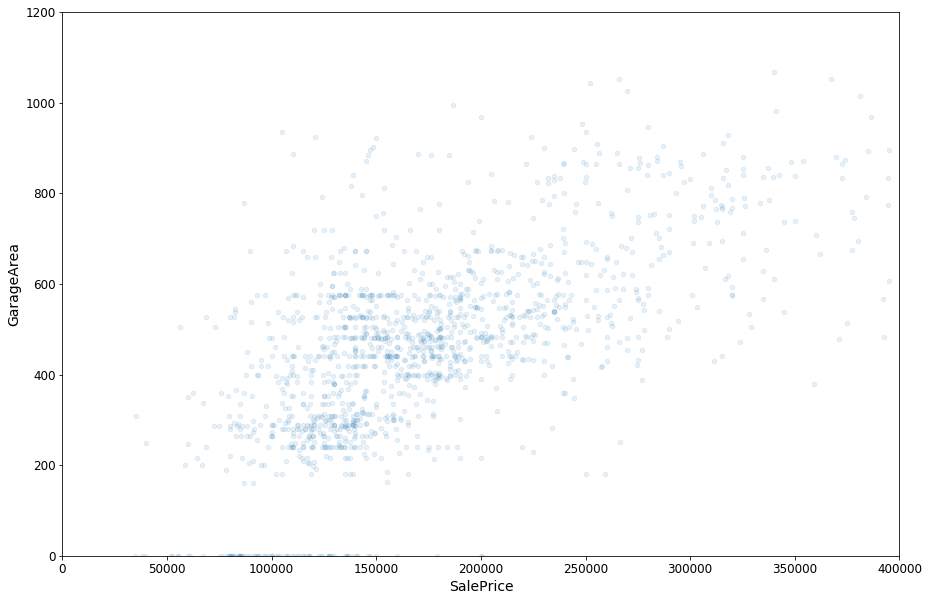

In [72]:
# Plot newly created features after feature engineering vs label
train_eda.plot(kind="scatter", x=label_col, y="GarageArea", alpha=0.1, figsize=(15,10))
plt.axis([0, 400000, 0, 1200])

In [ ]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

In [ ]:
# plot distributions of the newly engineered features.

# distribution of new features, grouped by value of corresponding target values
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[202:]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

In [ ]:
# distribution of new features values for train and test
features = train_df.columns.values[202:]
plot_new_feature_distribution(train_df, test_df, 'train', 'test', features)

# Prepare Data

In [ ]:
train_prep = train.copy()

# Split into features and labels
label = train_prep[label_col]
features = train_prep.drop(label_col, axis=1)

## Fill missing values

In [ ]:
sample_incomplete_rows = features[features.isnull().any(axis=1)].head()
sample_incomplete_rows

In [ ]:
missing_values_count = features.isnull().sum().sort_values(ascending=False)
missing_values_count

In [ ]:
# Ways of dealing with missing values

# Get rid of the corresponding datapoints
features.dropna(subset=["missing_feature"])

# Get rid of the whole attribute
features.drop("missing_feature", axis=1)

# Set the values to some value (zero, the mean, the median, etc.)
# save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data
median = features["missing_feature"].median()
features["missing_feature"].fillna(median, inplace=True)

Use an Imputer to impute missing values instead of calculating it manually.

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the missing_feature attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# The median can only be computed on numerical attributes, so we fetch the numerical attributes
features_num = features.select_dtypes(include=[np.number])

imputer.fit(features_num)

# Medians for each numerical feature
imputer.statistics_

# Fit to the training set
X = imputer.transform(features_num)

# The result is a plain NumPy array containing the transformed features. Convert it to a dataframe
features_num_tr = pd.DataFrame(X, columns=features_num.columns)

In [ ]:
# Check to see the result of Imputing
missing_values_count = features.isnull().sum().sort_values(ascending=False)
missing_values_count

features_num_tr_show = pd.DataFrame(X, columns=features_num.columns,
                          index = list(features.index.values))
features_num_tr_show.loc[sample_incomplete_rows.index.values]

## One Hot Encoding

- if the categorical features are ordinal ones, use label encoder

- if non-ordinal relation, use one hot encoder

- if you are using LightGBM, you can use label encoder and set categorical_feature = [cat feature name]

In [ ]:
features_cat = features.select_dtypes(exclude=[np.number])
features_cat.head(10)

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
features_cat_1hot = cat_encoder.fit_transform(features_cat)
features_cat_1hot # OHE returns a SciPy sparse matrix, instead of a NumPy array

## Skewed features

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x . Note that setting  λ=0  is equivalent to log1p. See [this page](http://onlinestatbook.com/2/transformations/box-cox.html) for more details on Box Cox Transformation as well as [the scipy function's page](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

## Custom Transformer

the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
train_extra_attribs = attr_adder.transform(train.values)

train_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(train.columns)+["rooms_per_household", "population_per_household"])
train_extra_attribs.head()

## Transformation Pipelines

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like (as long as they are unique and don’t contain double underscores “__”): they will come in handy later for hyperparameter tuning.

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the fit() method.

The pipeline exposes the same methods as the final estimator. In this example, the last estimator is a StandardScaler, which is a transformer, so the pipeline has a transform() method that applies all the transforms to the data in sequence (and of course also a fit_transform() method, which is the one we used).

Here is how this works: first we import the ColumnTransformer class, next we get the list of numerical column names and the list of categorical column names, and we construct a ColumnTransformer. The constructor requires a list of tuples, where each tuple contains a name22, a transformer and a list of names (or indices) of columns that the transformer should be applied to. In this example, we specify that the numerical columns should be transformed using the num_pipeline that we defined earlier, and the categorical columns should be transformed using a OneHotEncoder. Finally, we apply this ColumnTransformer to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns a dense matrix. When there is such a mix of sparse and dense matrices, the ColumnTransformer estimates the density of the final matrix (i.e., the ratio of non-zero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). In this example, it returns a dense matrix. And that’s it! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to each column.

### Numerical Features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

features_num_tr = num_pipeline.fit_transform(features_num)
features_num_tr

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(features_num)
cat_attribs = list(features_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# apply the full preprocessing pipeline to data
features_prepared = full_pipeline.fit_transform(features)
features_prepared[:5]

In [ ]:
features_prepared.shape

# Select and train a model

**Fixing Overfitting:**
- To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data or by constraining the model
- To gather more training data
- To reduce the noise in the training data (e.g., fix data errors and remove outliers)

**Fixing Underfitting:**
- Selecting a more powerful model, with more parameters
- Feeding better features to the learning algorithm (feature engineering)
- Reducing the constraints on the model (e.g., reducing the regularization hyperparameter)

## Apply transformation pipeline to test data

In [ ]:
# apply the full preprocessing pipeline on a test data
test_prepared = full_pipeline.transform(test_features)

## Train the models

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(features_prepared, labels)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(features_prepared, labels)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(features_prepared, labels)

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)

## Get the predictions

In [ ]:
# get predictions
lin_preds = lin_reg.predict(test_prepared)
tree_preds = tree_reg.predict(test_prepared)
forest_preds = forest_reg.predict(test_prepared)
svr_preds = svm_reg.predict(test_prepared)

## Get the score

In [ ]:
# get score
# mse
from sklearn.metrics import mean_squared_error

lin_rmse = np.sqrt(mean_squared_error(test_labels, lin_preds))
tree_rmse = np.sqrt(mean_squared_error(test_labels, tree_preds))
forest_rmse = np.sqrt(mean_squared_error(test_labels, forest_preds))
svr_rmse = np.sqrt(mean_squared_error(test_labels, svr_preds))

In [ ]:
# mae
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(test_labels, lin_preds)
tree_mae = mean_absolute_error(test_labels, tree_preds)
forest_mae = mean_absolute_error(test_labels, forest_preds)
svr_mae = mean_absolute_error(test_labels, svr_preds)

# Fine-tune model

Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach.

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(features_prepared, labels)

In [ ]:
# best hyperparameter combination found
grid_search.best_params_

In [ ]:
# best estimator combination found
grid_search.best_estimator_

In [ ]:
# cross validation results
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
# cross validation results - better display
pd.DataFrame(grid_search.cv_results_)

### Explore preparation options using GridSearchCV

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(features, labels)

In [ ]:
grid_search_prep.best_params_

## RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
# best hyperparameter combination found
rnd_search.best_params_

In [ ]:
# best estimator combination found
rnd_search.best_estimator_

In [ ]:
# cross validation results
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

## Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors. 

# Inspecting the best model

## Feature Importances

Feature importances indicate the relative importance of each attribute for making accurate predictions

In [ ]:
# feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
# display these importance scores next to their corresponding attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
# Plot feature importances
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

With this information, you may want to try removing some of the less useful features (e.g., if only one or a few categories of categorical variables are really useful, you could try removing the others).

You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or, on the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).

## Train model with most important k features

In [ ]:
# adding a transformer in the preparation pipeline to select only the most important attributes
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
k = 5

# get the indices of the top k features:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

# get the names of the top k features:
np.array(attributes)[top_k_feature_indices]

# double check that these are indeed the top k features
sorted(zip(feature_importances, attributes), reverse=True)[:k]

In [ ]:
# create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])
features_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(features)

In [ ]:
housing_prepared_top_k_features[0:3]

## Evaluate the best model

In [ ]:
# get the best model
final_model = grid_search.best_estimator_

# get the predictors and the labels from your test set
X_test = strat_test_set.drop("label_column", axis=1)
y_test = strat_test_set["label_column"].copy()

# run your full_pipeline to transform the data (call transform(), not fit_transform(), you do not want to fit the test set!)
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

# evaluate the final model on the test set
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is. For this, you can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval():

In [ ]:
# compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [ ]:
# or, compute the interval manually like this:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

# Alternatively, use z-scores rather than t-scores:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

# Misc

## full pipeline with both preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(features, labels)
full_pipeline_with_predictor.predict(predict_some_data)

## Save model

In [ ]:
my_model = full_pipeline_with_predictor
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF

## Load model

In [ ]:
my_model_loaded = joblib.load("my_model.pkl") # DIFF

# Present solution

1. Document what you have done.
2. Create a nice presentation.
    - Make sure you highlight the big picture first.
3. Explain why your solution achieves the business objective.
4. Don’t forget to present interesting points you noticed along the way.
    - Describe what worked and what did not.
    - List your assumptions and your system’s limitations.
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

# Launch!

1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).
2. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops.
    - Beware of slow degradation too: models tend to “rot” as data evolves.
    - Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
    - Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.
3. Retrain your models on a regular basis on fresh data (automate as much as possible).